<a href="https://colab.research.google.com/github/Ranjankraj/Shala/blob/main/ML_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [42]:
# Loading the candy data from an url
candy_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/candy-data.csv"
candy_data = pd.read_csv(candy_url)

In [ ]:
candy_data.head()

X = candy_data.drop(['winpercent', 'competitorname'], axis=1)
y = candy_data['winpercent']


0     66.971725
1     67.602936
2     32.261086
3     46.116505
4     52.341465
        ...    
80    45.466282
81    39.011898
82    44.375519
83    41.904308
84    49.524113
Name: winpercent, Length: 85, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=4)

# rfr = RandomForestRegressor()           ->Can also be passed this way

rfr.fit(X_train, y_train)

print('The error of the Training set is {0:.2f}'.format(mean_absolute_error(y_train, rfr.predict(X_train))))
print('The error of the Test set is {0:.2f}'.format(mean_absolute_error(y_test, rfr.predict(X_test))))

The error of the Training set is 3.99
The error of the Test set is 8.57


In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1111,
 'verbose': 0,
 'warm_start': False}

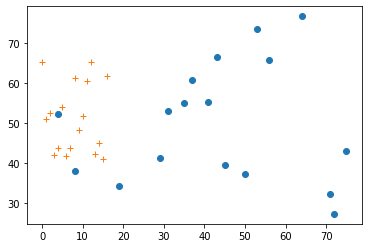

In [ ]:
plt.plot(y_test, 'o')
plt.plot(rfr.predict(X_test), '+')

In [ ]:
# Loading the tic_tac data from an url 
tic_tac_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/tic-tac-toe_csv.csv"
tic_tac_data = pd.read_csv(tic_tac_url)

# Printing the dimensions of tic tac data 
tic_tac_data.shape

(958, 10)

In [ ]:
tic_tac_data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [ ]:
tic_tac_data.rename(columns={'class': 'target'}, inplace=True)
# tic_tac_data

In [ ]:
mapping_for_moves = {'x':1, 'o':0}

tic_tac_data.target.value_counts()

True     626
False    332
Name: target, dtype: int64

In [ ]:
tic_tac_data.target = tic_tac_data.target.apply(lambda x: 0 if x==False else 1)

tic_tac_data.target.value_counts()

1    626
0    332
Name: target, dtype: int64

In [ ]:
y = tic_tac_data['target']
tic_tac_data = tic_tac_data.drop(['target'], axis=1)

In [ ]:
for i in tic_tac_data.columns:
  tic_tac_data[i] = tic_tac_data[i].map(mapping_for_moves)

tic_tac_data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
4,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN


In [ ]:
X = SimpleImputer().fit_transform(tic_tac_data)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

In [ ]:
from sklearn.metrics import accuracy_score

train_scores, test_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20,50]:

  rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
  rfc.fit(X_train, y_train)

  train_predictions = rfc.predict(X_train)
  test_predictions = rfc.predict(X_test)

  train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
  test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

print('The training scores were: {} '.format(train_scores))
print('The test scores were: {} '.format(test_scores))



The training scores were: [0.94, 0.95, 0.98, 0.99, 0.99, 1.0, 1.0, 1.0] 
The test scores were: [0.8, 0.8, 0.9, 0.91, 0.93, 0.96, 0.98, 1.0] 


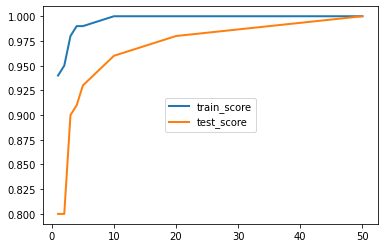

In [ ]:
z = [1, 2, 3, 4, 5, 10, 20, 50]
plt.plot(z, train_scores, linewidth=2)
plt.plot(z, test_scores, linewidth=2)
plt.legend(['train_score', 'test_score'], loc='center')

In [ ]:
toy_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/toy_data.csv"
data_set = pd.read_csv(toy_url) 

In [ ]:
data_set.head()

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,1000,Yes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94f698a128>,
      dtype=object)

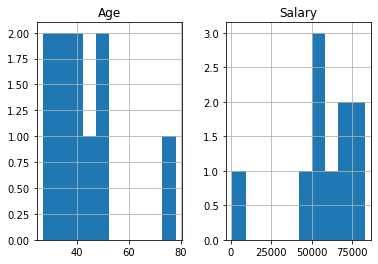

In [ ]:
data_set.hist()

In [ ]:
from sklearn import preprocessing

x = data_set.iloc[:, 1:3]

min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
x_after_min_max_scaler = min_max_scaler.fit_transform(x)

print('\n After min max scaling :\n {}'.format(x_after_min_max_scaler))


 After min max scaling :
 [[0.33333333 0.86585366]
 [0.         0.57317073]
 [0.05882353 0.64634146]
 [0.21568627 0.73170732]
 [0.25490196 0.        ]
 [0.15686275 0.69512195]
 [1.         0.62195122]
 [0.41176471 0.95121951]
 [0.45098039 1.        ]
 [0.19607843 0.80487805]]


In [ ]:
standardisation = preprocessing.StandardScaler()

x_after_standardisation = standardisation.fit_transform(x)

print('x after standardisation is : \n {}'.format(x_after_standardisation))

x after standardisation is : 
 [[ 0.09536935  0.66527061]
 [-1.15176827 -0.43586695]
 [-0.93168516 -0.16058256]
 [-0.34479687  0.16058256]
 [-0.1980748  -2.59226136]
 [-0.56487998  0.02294037]
 [ 2.58964459 -0.25234403]
 [ 0.38881349  0.98643574]
 [ 0.53553557  1.16995867]
 [-0.41815791  0.43586695]]


In [4]:
# Loading the dataset
diabetes_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/diabetes.csv"
diabetes_data = pd.read_csv(diabetes_url)

In [5]:
diabetes_data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [ ]:
diabetes_data.shape

(768, 9)

In [ ]:
diabetes_data.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_data.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [ ]:
diabetes_data.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


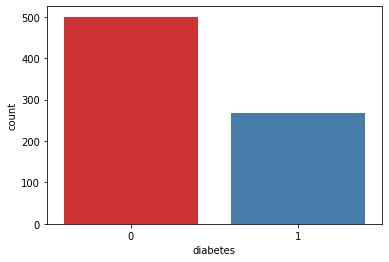

In [ ]:
sns.countplot(diabetes_data['diabetes'], palette='Set1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94f65e1358>,
      dtype=object)

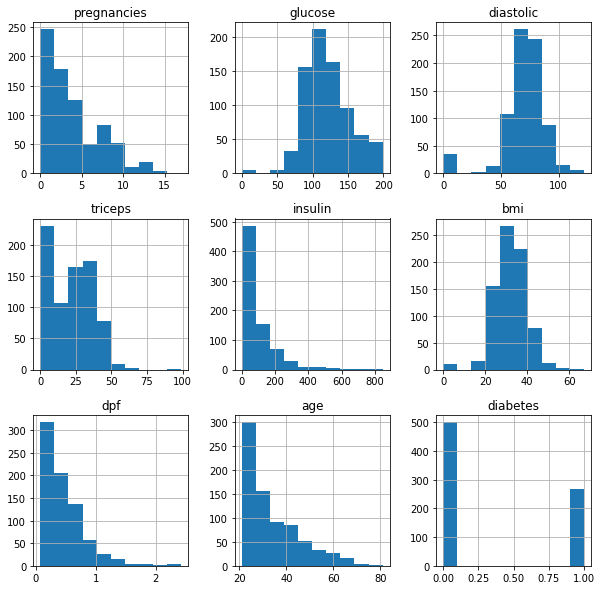

In [ ]:
diabetes_data.hist(figsize=(10,10))

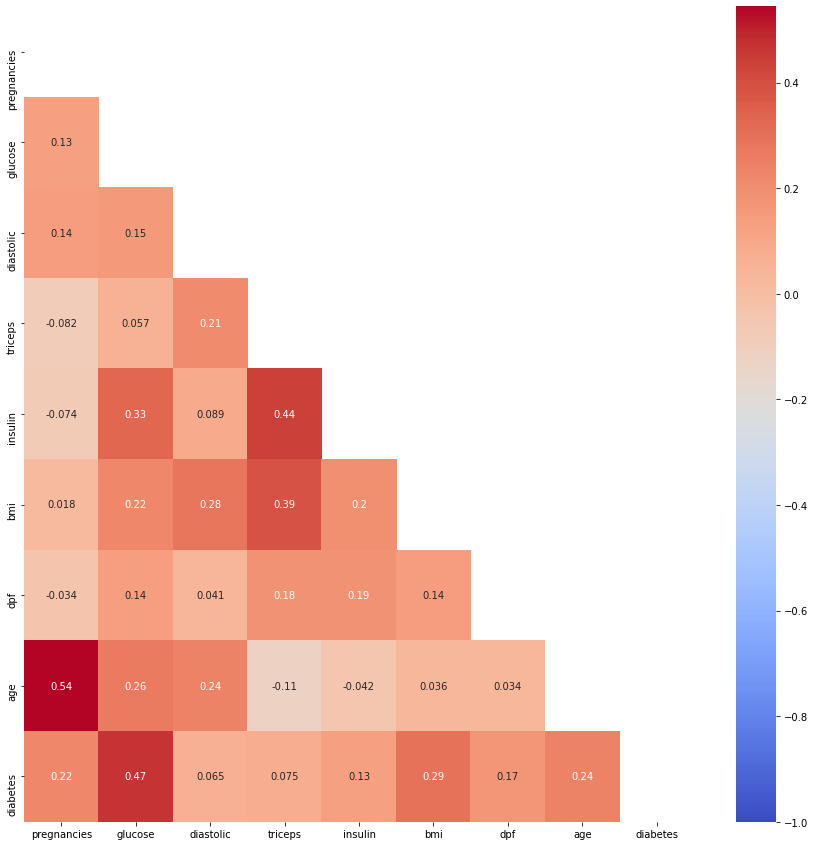

In [6]:
plt.figure(figsize=(15,15))

mask = np.zeros_like(diabetes_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(diabetes_data.corr(), cmap='coolwarm', annot=True, vmin=-1, mask=mask)

In [7]:
label = diabetes_data['diabetes']
features_df = diabetes_data.drop(['diabetes'], axis=1)



In [8]:


# Applying scaling on the features 
ss = StandardScaler()
features_df = ss.fit_transform(features_df)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(features_df, label, train_size=0.8, random_state=123)



In [10]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [11]:
predictions = xgb_clf.predict(X_train)

accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2),'%')

80.62 %


In [12]:
predictions = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

77.27 %


In [13]:
print(confusion_matrix(y_test, predictions))
print('='*60)
print(classification_report(y_test, predictions))

[[86 10]
 [25 33]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        96
           1       0.77      0.57      0.65        58

    accuracy                           0.77       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



Text(0.5, 1.0, 'XGBoost ROC curve')

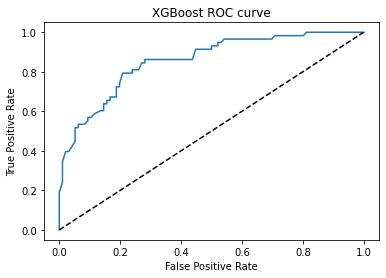

In [24]:
from sklearn.metrics import roc_curve
probs = xgb_clf.predict_proba(X_test)
probs = probs[:, 1]
# probs
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')

In [25]:
diabetes_data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=123)
results = cross_val_score(xgb_clf, X_train, y_train, cv=kfold)
results

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.80645161, 0.74193548, 0.64516129, 0.85483871, 0.63934426,
       0.78688525, 0.7704918 , 0.75409836, 0.78688525, 0.81967213])

Accuracy: 76.06% (6.66%)


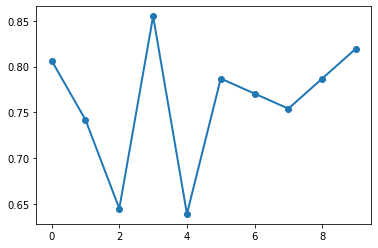

In [32]:
plt.plot(np.arange(10), results, 'o-', linewidth=2)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [33]:
from sklearn.model_selection import GridSearchCV

estimator = xgb.XGBClassifier(objective = 'binary:logistic', seed = 42)

In [35]:
parameters = {'max_depth' : range(2,10,1), 'n_estimators' : range(60, 220, 40), 'learning_rate' : [0.1, 0.01, 0.05]}

In [37]:
grid_search = GridSearchCV(estimator = estimator, param_grid = parameters, scoring = 'roc_auc', n_jobs = 10, cv = 10, verbose=True)

In [40]:
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    1.6s
[Parallel(n_jobs=10)]: Done 250 tasks      | elapsed:   14.8s
[Parallel(n_jobs=10)]: Done 500 tasks      | elapsed:   31.2s
[Parallel(n_jobs=10)]: Done 850 tasks      | elapsed:   57.3s
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  1.1min finished


({'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 180},
 0.8331910569105692)

In [41]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)